In [1]:
%matplotlib inline
## %gui wx ## if we use mayavi !

import matplotlib.pyplot as plt
from matplotlib import cm

from badlands import meshtools 
from badlands import TreMesh
from badlands import HeightMesh
from badlands import SurfaceProcessMesh

import numpy as np
import scipy.interpolate as interpolate

 - Calculating Delaunay Triangulation  0.197328 s
 - Triangulation Neighbour Lists  0.949779 s
 - Triangulation Local Areas and Weights  0.83974 s
 - Triangulation Vector Operators  0.827405 s
 - Local Smoothing Operator  0.121376 s
 - Sorted all nodes by height (high to low)  0.066416 s
 - Built downhill matrices  0.07151 s
 - Built cumulative area 0.059256 s
 - Found low points 0.00770199999999 s
 - Found outflow points 0.007396 s
 - Sorted all nodes by height (high to low)  0.06119 s
 - Built downhill matrices  0.067228 s


<matplotlib.colorbar.Colorbar instance at 0x1175aebd8>

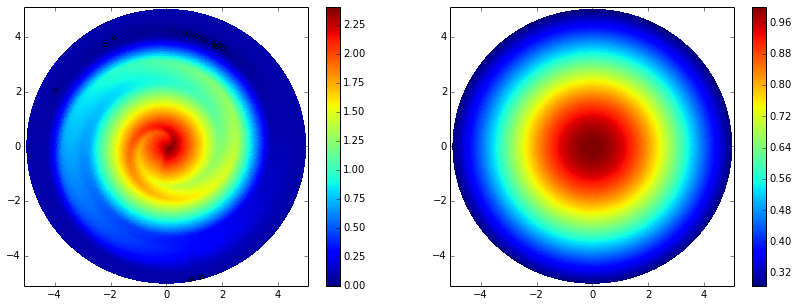

In [23]:


mesh5 = SurfaceProcessMesh(filename="Spiral.0005.npz", verbose=True)

x5 = mesh5.x
y5 = mesh5.y
h5 = mesh5.height
rainfall=mesh5.rainfall_pattern


low_points = mesh5.identify_low_points()
mesh5.height = mesh5.handle_low_points2( 0.0, 10, verbose=False)
mesh5.update_height(mesh5.height)
low_points = mesh5.identify_low_points()



fig, (plot1, plot2) = plt.subplots(1,2)
fig.set_size_inches(14,5)

plot1.set_xlim(-5.1, 5.1)
plot1.set_ylim(-5.1, 5.1)
plot2.set_xlim(-5.1, 5.1)
plot2.set_ylim(-5.1, 5.1)

hc1 = plot1.tripcolor(x5,y5,h5)
hc2 = plot2.tripcolor(x5,y5,rainfall)

if len(low_points):
    plot1.scatter(x5[low_points], y5[low_points], marker='o', s=10.0)

fig.colorbar(hc1, ax=plot1)
fig.colorbar(hc2, ax=plot2)




In [24]:
mesh5.build_node_chains()

<function matplotlib.pyplot.show>

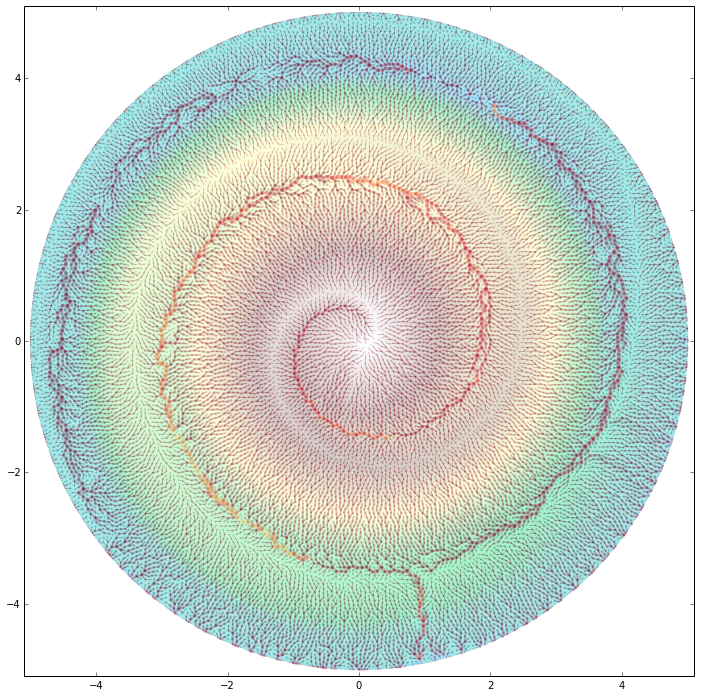

In [25]:
fig = plt.figure(figsize=(12, 12), facecolor="none")
# plt.xlim(minX, maxX)
# plt.ylim(minY, maxY)

plt.xlim(-5.1,5.1)
plt.ylim(-5.1,5.1)

power = mesh5.slope * mesh5.upstream_area # each to some power, but this is a good start.

log_upstream_area = np.log(mesh5.upstream_area)
# downstream_dist   = mesh5.node_downstream_distance

stream_color_var = power
stream_width_var = log_upstream_area

norm1 = plt.Normalize(vmin=stream_color_var.min(), vmax=stream_color_var.max())
norm2 = plt.Normalize(vmin=stream_width_var.min(), vmax=stream_width_var.max())

for idx, chain in enumerate(mesh5.node_chain_list[-1:0:-1]):
    xx = mesh5.tri.points[chain].T[0]
    yy = mesh5.tri.points[chain].T[1]
    
    for nn,node in enumerate(chain[0:-1]):
        xs = (xx[nn], xx[nn+1])
        ys = (yy[nn], yy[nn+1])
    
        color = plt.cm.YlOrRd_r( norm1(stream_color_var[node]) )
        width = 4.0 * norm2(stream_width_var[node])
        plt.plot(xs,ys, color=color, alpha=0.25, marker="", linewidth=width)
    
    

# plt.triplot(x, y, tri.simplices.copy(), linewidth=0.5, color="#AABBBB", zorder=2)
plt.tripcolor(mesh5.x, mesh5.y, mesh5.tri.simplices.copy(), mesh5.height, cmap=cm.terrain, shading="gouraud", vmin=-0.5, alpha=0.25)
  
plt.show    





In [26]:
fig.savefig("SpiralChains.png", dpi=300)    

In [19]:
%%sh

open "SpiralChains.png"

<matplotlib.colorbar.Colorbar instance at 0x15aef8b90>

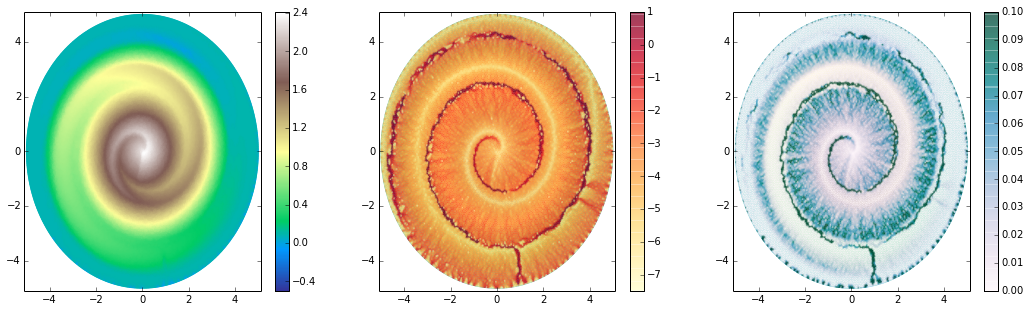

In [29]:
# This is the result 

import matplotlib.pyplot as plt
from matplotlib import cm

fig, (plot1, plot2, plot3) = plt.subplots(1,3)
fig.set_size_inches(18,5)
fig.set_dpi(300)

plot1.set_xlim(-5.1, 5.1)
plot1.set_ylim(-5.1, 5.1)
plot2.set_xlim(-5.1, 5.1)
plot2.set_ylim(-5.1, 5.1)
plot3.set_xlim(-5.1, 5.1)
plot3.set_ylim(-5.1, 5.1)

sm1 = mesh5.add_node_data_to_plot(plot1, mesh5.height, cmap=cm.terrain, shading="gouraud", vmin=-0.5)
fig.colorbar(sm1, ax=plot1)

sm1 = mesh5.add_node_data_to_plot(plot2, mesh5.height, cmap=cm.terrain, shading="gouraud", vmin=-0.5, alpha=0.5)
sm2 = mesh5.add_node_data_to_plot(plot2, np.log(mesh5.upstream_area), cmap=cm.YlOrRd, shading="gouraud", vmax=1.0, alpha=0.5)
fig.colorbar(sm2, ax=plot2)

sm1 = mesh5.add_node_data_to_plot(plot3, mesh5.height, cmap=cm.terrain, shading="gouraud", vmin=-0.5, alpha=0.5)
sm3 = mesh5.add_node_data_to_plot(plot3, mesh5.upstream_area * mesh5.slope, cmap=cm.PuBuGn, shading="gouraud", vmax=0.1, alpha=0.5)
fig.colorbar(sm3, ax=plot3)
 
# plt.show() 



depo min/max, mean 0.0 247.977918765 0.0122737041558
depo min/max, mean 0.0 241.214375161 0.0119389415542
depo min/max, mean 0.0 244.715858655 0.0121122480031


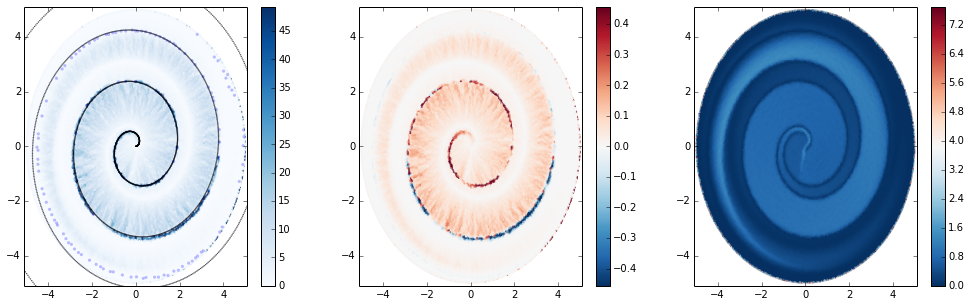

In [4]:
# This is how to obtain the erosion rate / deposition rate 

# mesh5.update_height(z5)
# mesh5.update_surface_processes()

# erosion_rate, deposition_rate, stream_power = mesh5.stream_power_erosion_deposition_rate(0.01, 0, 0, 0, 0)
# erosion_deposition_rate = erosion_rate - deposition_rate

erosion_rate, deposition_rate, stream_power = \
         mesh5.stream_power_erosion_deposition_rate2(efficiency=0.01, 
                                                    smooth_power=0, 
                                                    smooth_low_points=2, 
                                                    smooth_erosion_rate=0, 
                                                    smooth_deposition_rate=2, 
                                                    smooth_operator=mesh5.downhill_smoothing,
                                                    centre_weight_u=0.75, centre_weight=0.5)

    
    
erosion_deposition_rate = erosion_rate - deposition_rate

# flat_spots = mesh5.identify_flat_spots()
# smoothed_deposition_rate = deposition_rate.copy()
# smoothed_deposition_rate[np.invert(flat_spots)] = 0.0
# smoothed_deposition_rate = mesh5.local_area_smoothing(smoothed_deposition_rate, its=2, centre_weight=0.5)
# deposition_rate[flat_spots] = smoothed_deposition_rate[flat_spots]
     
erosion_deposition_rate2 = erosion_rate - deposition_rate


print "depo min/max, mean", deposition_rate.min(), deposition_rate.sum(), deposition_rate.mean()

deposition_rate2 = mesh5.streamwise_smoothing(deposition_rate, 5)

print "depo min/max, mean", deposition_rate2.min(), deposition_rate2.sum(), deposition_rate2.mean()

deposition_rate3 = mesh5.local_area_smoothing(deposition_rate, 5, centre_weight=0.5)
print "depo min/max, mean", deposition_rate3.min(), deposition_rate3.sum(), deposition_rate3.mean()

not_so_low_points = []
for node in mesh5.low_points:
    if mesh5.height[node] > 0.005 * mesh5.height.max():
        not_so_low_points.append(node)

fig, (plot1, plot2, plot3) = plt.subplots(1,3)
fig.set_size_inches(17,5)

plot1.set_xlim(-5.1, 5.1)
plot1.set_ylim(-5.1, 5.1)
plot2.set_xlim(-5.1, 5.1)
plot2.set_ylim(-5.1, 5.1)
plot3.set_xlim(-5.1, 5.1)
plot3.set_ylim(-5.1, 5.1)


maxED  =    erosion_deposition_rate[bmask].max() / 5.0 
maxPWR =    stream_power[bmask].max() / 5.0
#maxCUM =    cumulative_rain[bmask].max() / 2.0

sm1 = mesh5.add_node_data_to_plot(plot1, stream_power, vmin=0.0, vmax=maxPWR, cmap=cm.Blues,  shading="gouraud")
#plot1.tricontour(mesh5.x, mesh5.y, mesh5.tri.simplices.copy(), mesh5.height, (0.001, 0.01, 0.1, 0.99))
#sm1b = mesh5.add_node_data_to_plot(plot1, mesh5.rainfall_pattern, cmap=cm.BrBG, shading="gouraud", alpha=0.1)
plot1.scatter(mesh5.x[mesh5.low_points], mesh5.y[mesh5.low_points],10, marker="o", alpha=0.25, linewidth=0.0)
plot1.scatter(x2,y2, s=0.1)



fig.colorbar(sm1, ax=plot1)

sm2 = mesh5.add_node_data_to_plot(plot2, erosion_deposition_rate, vmin=-maxED, vmax=maxED, cmap=cm.RdBu_r,  shading="gouraud") #, vmax=maxDR)
fig.colorbar(sm2, ax=plot2)

sm3 = mesh5.add_node_data_to_plot(plot3, mesh5.slope, cmap=cm.RdBu_r,  shading="gouraud") #, vmax=maxDR)
fig.colorbar(sm3, ax=plot3)

fig.savefig("ziggurat-power.png", dpi=300)
#plt.close()
    


In [5]:
%%sh

open ziggurat-power.png

In [5]:
# Decomposed mesh 
    
# Quadrant 1 - 4 

# Could make this a submesh class with a condition !

mesh5Identifier = np.zeros(mesh5.tri.npoints)


meshQ1nodes      = np.where( np.logical_and(x5 < 0.0,  y5 < 0.0)  ) 
meshQ1shadow     = np.where( np.logical_and(x5 < 0.2,  y5 < 0.2) ) 
meshQ1shadowOnly = np.setdiff1d( meshQ1shadow, meshQ1nodes)
mesh5Identifier[meshQ1nodes] = 1

xq1 = mesh5.x[meshQ1nodes]
yq1 = mesh5.y[meshQ1nodes]
hq1 = mesh5.height[meshQ1nodes]
rq1 = mesh5.rainfall_pattern[meshQ1nodes]
bq1 = mesh5.bmask[meshQ1nodes]

# For computation we don't need this mesh, only the node list 
meshQ1 = SurfaceProcessMesh(xq1, yq1, hq1, rq1, bq1, verbose=False, storeDense=False)

xq1 = mesh5.x[meshQ1shadow]
yq1 = mesh5.y[meshQ1shadow]
hq1 = mesh5.height[meshQ1shadow]
rq1 = mesh5.rainfall_pattern[meshQ1shadow]
bq1 = mesh5.bmask[meshQ1shadow]

meshQ1s = SurfaceProcessMesh(xq1, yq1, hq1, rq1, bq1, verbose=False, storeDense=False)

## Q2

meshQ2nodes   = np.where( np.logical_and(x5 >  0.0,  y5 <  0.0)  ) 
meshQ2shadow  = np.where( np.logical_and(x5 > -0.2,  y5 <  0.2) ) 
meshQ2shadowOnly = np.setdiff1d( meshQ2shadow, meshQ2nodes)
mesh5Identifier[meshQ2nodes] = 2

xq1 = mesh5.x[meshQ2nodes]
yq1 = mesh5.y[meshQ2nodes]
hq1 = mesh5.height[meshQ2nodes]
rq1 = mesh5.rainfall_pattern[meshQ2nodes]
bq1 = mesh5.bmask[meshQ2nodes]

# For computation we don't need this mesh, only the node list 
meshQ2 = SurfaceProcessMesh(xq1, yq1, hq1, rq1, bq1, verbose=False, storeDense=False)

xq1 = mesh5.x[meshQ2shadow]
yq1 = mesh5.y[meshQ2shadow]
hq1 = mesh5.height[meshQ2shadow]
rq1 = mesh5.rainfall_pattern[meshQ2shadow]
bq1 = mesh5.bmask[meshQ2shadow]

meshQ2s = SurfaceProcessMesh(xq1, yq1, hq1, rq1, bq1, verbose=False, storeDense=False)

## Q3

meshQ3nodes   = np.where( np.logical_and(x5 >  0.0,  y5 >  0.0)  ) 
meshQ3shadow  = np.where( np.logical_and(x5 > -0.2,  y5 > -0.2) ) 
meshQ3shadowOnly = np.setdiff1d( meshQ3shadow, meshQ3nodes)
mesh5Identifier[meshQ3nodes] = 3


xq1 = mesh5.x[meshQ3nodes]
yq1 = mesh5.y[meshQ3nodes]
hq1 = mesh5.height[meshQ3nodes]
rq1 = mesh5.rainfall_pattern[meshQ3nodes]
bq1 = mesh5.bmask[meshQ3nodes]

# For computation we don't need this mesh, only the node list 
meshQ3 = SurfaceProcessMesh(xq1, yq1, hq1, rq1, bq1, verbose=False, storeDense=False)

xq1 = mesh5.x[meshQ3shadow]
yq1 = mesh5.y[meshQ3shadow]
hq1 = mesh5.height[meshQ3shadow]
rq1 = mesh5.rainfall_pattern[meshQ3shadow]
bq1 = mesh5.bmask[meshQ3shadow]

meshQ3s = SurfaceProcessMesh(xq1, yq1, hq1, rq1, bq1, verbose=False, storeDense=False)

## Q4

meshQ4nodes   = np.where( np.logical_and(x5 <  0.0,  y5 >  0.0)  ) 
meshQ4shadow  = np.where( np.logical_and(x5 <  0.2,  y5 > -0.2) ) 
meshQ4shadowOnly = np.setdiff1d( meshQ4shadow, meshQ4nodes)
mesh5Identifier[meshQ4nodes] = 4

xq1 = mesh5.x[meshQ4nodes]
yq1 = mesh5.y[meshQ4nodes]
hq1 = mesh5.height[meshQ4nodes]
rq1 = mesh5.rainfall_pattern[meshQ4nodes]
bq1 = mesh5.bmask[meshQ4nodes]

# For computation we don't need this mesh, only the node list 
meshQ4 = SurfaceProcessMesh(xq1, yq1, hq1, rq1, bq1, verbose=False, storeDense=False)

xq1 = mesh5.x[meshQ4shadow]
yq1 = mesh5.y[meshQ4shadow]
hq1 = mesh5.height[meshQ4shadow]
rq1 = mesh5.rainfall_pattern[meshQ4shadow]
bq1 = mesh5.bmask[meshQ4shadow]

meshQ4s = SurfaceProcessMesh(xq1, yq1, hq1, rq1, bq1, verbose=False, storeDense=False)


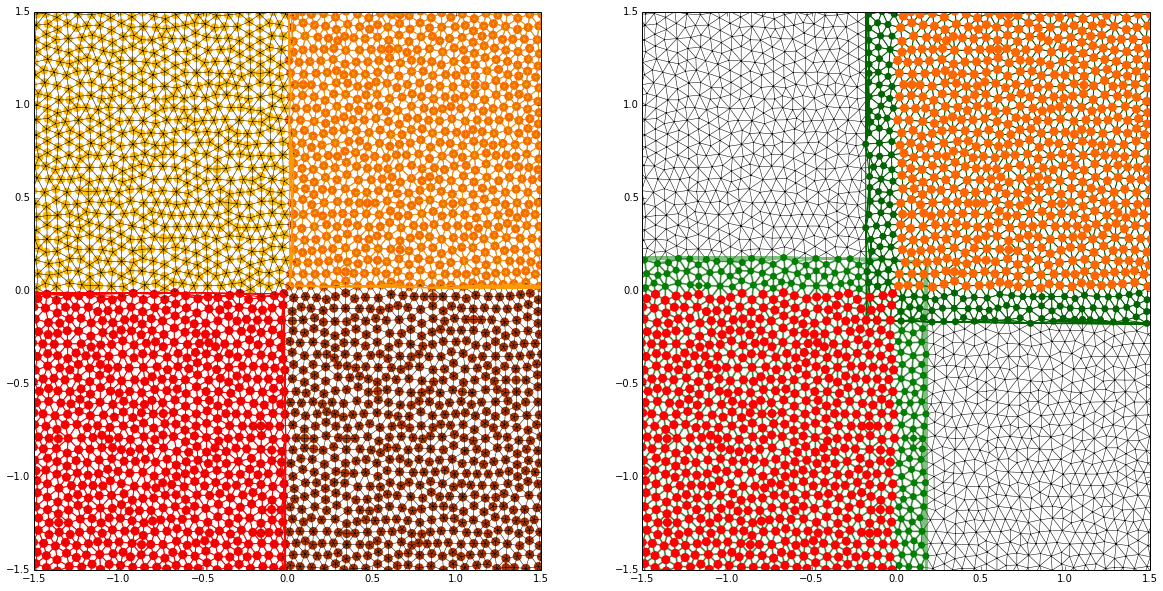

In [6]:
fig, (plot1,plot2) = plt.subplots(1,2)
fig.set_size_inches(20,10)

lim = 1.5

plot1.set_xlim(-lim, lim)
plot1.set_ylim(-lim, lim)
plot2.set_xlim(-lim, lim)
plot2.set_ylim(-lim, lim)

plot1.triplot(mesh5.x, mesh5.y, mesh5.tri.simplices, marker=None, linewidth=0.5)
plot1.triplot(meshQ1.x, meshQ1.y, meshQ1.tri.simplices, marker=None, color="Red", linewidth=1.0)
plot1.triplot(meshQ3.x, meshQ3.y, meshQ3.tri.simplices, marker=None, color="#FF9900", linewidth=1.0)
plot1.scatter(meshQ1.x, meshQ1.y, s=50.0, marker='o', linewidth=2, color="Red")
plot1.scatter(meshQ2.x, meshQ2.y, s=50.0, marker='o', linewidth=2, color="#AA3300")
plot1.scatter(meshQ3.x, meshQ3.y, s=50.0, marker='o', linewidth=2, color="#FF6600")
plot1.scatter(meshQ4.x, meshQ4.y, s=50.0, marker='o', linewidth=2, color="#FFBB00")
plot2.triplot(mesh5.x, mesh5.y, mesh5.tri.simplices, marker=None, linewidth=0.5, zorder=0)
plot2.triplot(meshQ1s.x, meshQ1s.y, meshQ1s.tri.simplices, marker=None, color="Green", linewidth=2.0, alpha=0.5,zorder=1)
plot2.scatter(meshQ1s.x, meshQ1s.y, s=50.0, marker='o', linewidth=0.0, color="Green", zorder=1)
plot2.triplot(meshQ3s.x, meshQ3s.y, meshQ3s.tri.simplices, marker=None, color="DarkGreen", linewidth=1.0, zorder=1)
plot2.scatter(meshQ3s.x, meshQ3s.y, s=50.0, marker='o', linewidth=0.0, color="DarkGreen", zorder=1)
plot2.scatter(meshQ3.x, meshQ3.y, s=50.0, marker='o', linewidth=2, color="#FF6600", zorder=2)
plot2.scatter(meshQ1.x, meshQ1.y, s=50.0, marker='o', linewidth=2, color="Red",zorder=2)





In [7]:
#%%timeit
# Matrix-vector multiplication on the sub meshes !!

vector = mesh5.area.copy() # say
result = np.zeros(mesh5.tri.npoints)
target = mesh5.downhillMat.dot(vector)

# load the RHS with only the values in the local mesh but
# into the larger mesh which also has the shadow nodes

vecQ1 = np.where(mesh5Identifier == 1, vector, 0.0)[meshQ1shadow]
resQ1 = meshQ1s.downhillMat.dot(vecQ1)

vecQ2 = np.where(mesh5Identifier == 2, vector, 0.0)[meshQ2shadow]
resQ2 = meshQ2s.downhillMat.dot(vecQ2)

vecQ3 = np.where(mesh5Identifier == 3, vector, 0.0)[meshQ3shadow]
resQ3 = meshQ3s.downhillMat.dot(vecQ3)

vecQ4 = np.where(mesh5Identifier == 4, vector, 0.0)[meshQ4shadow]
resQ4 = meshQ4s.downhillMat.dot(vecQ4)

result[meshQ1shadow] += resQ1
result[meshQ2shadow] += resQ2
result[meshQ3shadow] += resQ3
result[meshQ4shadow] += resQ4

print "Error - ",(result - target).max()

Error -  1.73472347598e-18


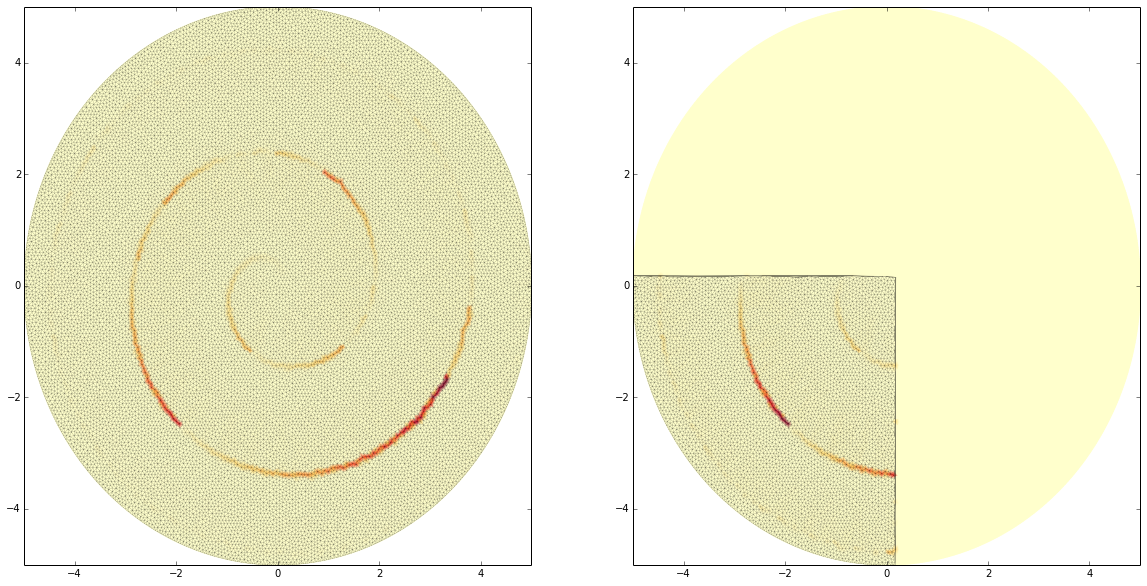

In [8]:
cum0 = mesh5.cumulative_flow(mesh5.area*mesh5.rainfall_pattern)

cum1 = meshQ1s.cumulative_flow(mesh5.area[meshQ1shadow])
cum2 = meshQ1s.cumulative_flow(mesh5.area[meshQ1shadow])
cum3 = meshQ1s.cumulative_flow(mesh5.area[meshQ1shadow])
cum4 = meshQ1s.cumulative_flow(mesh5.area[meshQ1shadow])

cum1p = np.zeros(mesh5.tri.npoints) 
cum1p[meshQ1shadow] = cum1

fig, (plot1,plot2) = plt.subplots(1,2)
fig.set_size_inches(20,10)

lim = 5.0

plot1.set_xlim(-lim, lim)
plot1.set_ylim(-lim, lim)
plot2.set_xlim(-lim, lim)
plot2.set_ylim(-lim, lim)

sm1 = mesh5.add_node_data_to_plot(plot1,cum0, cmap=cm.YlOrRd,  shading="gouraud", alpha=1.0)
sm2 = mesh5.add_node_data_to_plot(plot2,cum1p, cmap=cm.YlOrRd,  shading="gouraud", alpha=1.0)
plot1.triplot(mesh5.x, mesh5.y, mesh5.tri.simplices, color="Black", linewidth=0.25, alpha=0.5)
plot2.triplot(meshQ1s.x, meshQ1s.y, meshQ1s.tri.simplices, color="Black", linewidth=0.25, alpha=0.5)




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


KeyboardInterrupt: 

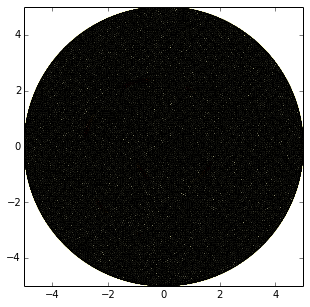

In [76]:
## Make a series of plots to show the flow of information on this mesh

# vector = mesh5.area.copy()

vector = np.ones(mesh5.tri.npoints)

DX0 = vector.copy()
DX1 = vector.copy()

fig, (plot1) = plt.subplots(1,1)
fig.set_size_inches(5,5)

plot1.axes.set_aspect("equal")

lim = 5.0
plot1.set_xlim(-lim, lim)
plot1.set_ylim(-lim, lim)

step=0
while DX1.any() and step < 100: 
    print step
    
    
    sm1 = mesh5.add_node_data_to_plot(plot1, DX1, cmap=cm.YlOrRd, vmin=0.0, vmax=1.0, shading="gouraud", alpha=1.0, zorder=0)
    plot1.triplot(mesh5.x, mesh5.y, mesh5.tri.simplices, color="Black", linewidth=0.1, alpha=0.5, zorder=1)
    fig.savefig("SpiralInfoPropagation.{:03d}.png".format(step), dpi=300)
    step += 1
    
    DX1 = mesh5.downhillMat.dot(DX1)
    DX0 += DX1    


    


In [74]:
print DX1.min()

0.0


In [25]:
ls SpiralInfo*

SpiralInfo.000.png  SpiralInfo.003.png  SpiralInfo.006.png  SpiralInfo.009.png  SpiralInfo.012.png  SpiralInfo.015.png
SpiralInfo.001.png  SpiralInfo.004.png  SpiralInfo.007.png  SpiralInfo.010.png  SpiralInfo.013.png
SpiralInfo.002.png  SpiralInfo.005.png  SpiralInfo.008.png  SpiralInfo.011.png  SpiralInfo.014.png


## Determine the erosion / deposition for this mesh





In [ ]:
%%sh

pwd

In [10]:
# %%prun -s cumulative -q -T prunErosionDeposition

# Test the time evolution with a mid-point method

import time as systime

kappa = 1.0e-3
critical_slope = 2.0      # Critical value - assume slides etc take over to limit slope
lowest_slope   = 1.0e-3   # The slope where we cut off the erosion / deposition algorithm
base = 0.0
totalSteps = 0

mesh5.verbose = False

typical_l = np.sqrt(mesh5.area)

# Reset the height

reset = False

if reset:
    totalSteps = 0
    h5 = np.exp(-0.025*(x5**2 + y5**2)**2) + 0.001 * np.random.rand(len(x5))
    mesh5.rainfall_pattern = h5**2  # say !
    mesh5.rainfall_pattern[ mesh5.x > 0] *= ( 1.0 - mesh5.x[ mesh5.x > 0] * 0.2 )**3
    mesh5.update_height(h5)
    mesh5.update_surface_processes()
    


time = 0.0
viz_time= 0.0
vizzes = 0

running_average_uparea = mesh5.cumulative_flow(mesh5.area * mesh5.rainfall_pattern)

for step in range(0,100):
    totalSteps += 1
    walltime = systime.clock()
    
    delta = h5-mesh5.height
    efficiency = 0.01 # + np.where(delta < -0.00, 0.01, 0.0)
  
    # Erosion + deposition
    
    erosion_rate, deposition_rate, stream_power = \
         mesh5.stream_power_erosion_deposition_rate2(efficiency=efficiency, 
                                                    smooth_power=1, 
                                                    smooth_low_points=0, 
                                                    smooth_erosion_rate=0, 
                                                    smooth_deposition_rate=2, 
                                                    smooth_operator=mesh5.downhill_smoothing,
                                                    centre_weight_u=0.666, centre_weight=0.75)

        
    # Smooth deposition in flat areas ... perhaps this could be replaced by multiple pathways in 
    # flat areas.
    
    erosion_deposition_rate = erosion_rate - deposition_rate
    erosion_timestep    = ((mesh5.slope + lowest_slope) * typical_l / (np.abs(erosion_rate)+0.000001)).min()
    deposition_timestep = ((mesh5.slope + lowest_slope) * typical_l / (np.abs(deposition_rate)+0.000001)).min()
         
    # Diffusion
        
    diffDz, diff_timestep =  mesh5.landscape_diffusion_critical_slope(kappa, critical_slope, True)
        
    ## Mid-point method. Update the height and use this to estimate the new rates of 
    ## Change. Note that we have to assume that the flow pattern doesn't change for this 
    ## to work. This means we can't call the methods which do a full update !
    
    timestep = min(erosion_timestep, deposition_timestep, diff_timestep)
    time = time + timestep
    viz_time = viz_time + timestep

    # Height predictor step (at half time)
    
    height0 = mesh5.height.copy()
    mesh5.height -= 0.5 * timestep * (erosion_deposition_rate - diffDz )
    mesh5.height = np.clip(mesh5.height, base, 1.0e9)   
    
    # Deal with internal drainages !
    mesh5.height = mesh5.handle_low_points2(base, 5)  
    gradZx, gradZy = mesh5.delaunay_grad(mesh5.height)
    mesh5.slope = np.sqrt(gradZx**2+gradZy**2)   
    
    # Recalculate based on mid-point values
    
    erosion_rate, deposition_rate, stream_power = \
         mesh5.stream_power_erosion_deposition_rate2(efficiency=efficiency, 
                                                    smooth_power=1, 
                                                    smooth_low_points=0, 
                                                    smooth_erosion_rate=0, 
                                                    smooth_deposition_rate=2, 
                                                    smooth_operator=mesh5.downhill_smoothing,
                                                    centre_weight_u=0.666, centre_weight=0.75)
        
        
    # Smooth deposition in flat areas ...
             
    erosion_deposition_rate = erosion_rate - deposition_rate
    erosion_timestep    = ((mesh5.slope + lowest_slope) * typical_l / (np.abs(erosion_rate)+0.000001)).min()
    deposition_timestep = ((mesh5.slope + lowest_slope) * typical_l / (np.abs(deposition_rate)+0.000001)).min()
   
    diffDz, diff_timestep =  mesh5.landscape_diffusion_critical_slope(kappa, critical_slope, True)
 
    timestep = min(erosion_timestep, deposition_timestep, diff_timestep)
    
    # Now take the full timestep

    height0 -= timestep * (erosion_deposition_rate - diffDz )
    mesh5.height = np.clip(height0, base, 1.0e9)  
    mesh5.height = mesh5.handle_low_points2(base, 5)

    mesh5.update_height(mesh5.height)
    mesh5.update_surface_processes()
    
    running_average_uparea = 0.5 * running_average_uparea + 0.5 * mesh5.cumulative_flow(mesh5.area * mesh5.rainfall_pattern)


    
    if step%10 == 0:
        print "{:04d} - ".format(step), \
          " dt - {:.5f} ({:.5f}, {:.5f}, {:.5f})".format(timestep, diff_timestep, erosion_timestep, deposition_timestep), \
          " time - {:.4f}".format(time), \
          " Max slope - {:.3f}".format(mesh5.slope.max()), \
          " Step walltime - {:.3f}".format(systime.clock()-walltime)
            
        # print low_point_report
              
    # Store data
    
    if( viz_time > 0.01 or step==0):

        viz_time = 0.0
        vizzes = vizzes + 1

        delta = h5-mesh5.height
        smoothHeight = mesh5.local_area_smoothing(mesh5.height, its=2, centre_weight=0.75)
        
        np.savez("Spiral.{:04d}".format(vizzes), x=mesh5.x, y=mesh5.y, h=smoothHeight, 
                  triang=mesh5.tri.simplices, delta=delta, uparea=running_average_uparea )

 

0000 -   dt - 0.00012 (0.00503, 0.00060, 0.00012)  time - 0.0001  Max slope - 7.231  Step walltime - 0.615
0010 -   dt - 0.00032 (0.00503, 0.00032, 0.00144)  time - 0.0016  Max slope - 7.225  Step walltime - 0.858
0020 -   dt - 0.00022 (0.00503, 0.00022, 0.00068)  time - 0.0030  Max slope - 7.217  Step walltime - 0.961
0030 -   dt - 0.00016 (0.00503, 0.00067, 0.00016)  time - 0.0045  Max slope - 7.210  Step walltime - 0.643
0040 -   dt - 0.00015 (0.00503, 0.00015, 0.00142)  time - 0.0058  Max slope - 7.202  Step walltime - 0.915
0050 -   dt - 0.00029 (0.00503, 0.00029, 0.00158)  time - 0.0069  Max slope - 7.193  Step walltime - 0.478
0060 -   dt - 0.00011 (0.00503, 0.00011, 0.00206)  time - 0.0087  Max slope - 7.179  Step walltime - 0.849
0070 -   dt - 0.00016 (0.00503, 0.00016, 0.00265)  time - 0.0108  Max slope - 7.159  Step walltime - 0.904
0080 -   dt - 0.00047 (0.00503, 0.00088, 0.00047)  time - 0.0148  Max slope - 7.123  Step walltime - 0.661
0090 -   dt - 0.00001 (0.00503, 0.000